In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create and connect to the SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2. Create the sales table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()

In [4]:
# 3. Insert some sample sales data
sales_data = [
    ('Laptop', 2, 1200.00),
    ('Mouse', 5, 25.00),
    ('Keyboard', 3, 75.00),
    ('Laptop', 1, 1150.00),
    ('Monitor', 4, 300.00),
    ('Mouse', 2, 22.50),
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

# 4. SQL query to get total quantity and revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM
    sales
GROUP BY
    product
ORDER BY
    total_revenue DESC;
"""

# 5. Execute the SQL query and load the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# 6. Print the DataFrame (sales summary)
print("\n--- Basic Sales Summary ---")
print(df)



--- Basic Sales Summary ---
    product  total_quantity  total_revenue
0    Laptop               3         3550.0
1   Monitor               4         1200.0
2  Keyboard               3          225.0
3     Mouse               7          170.0


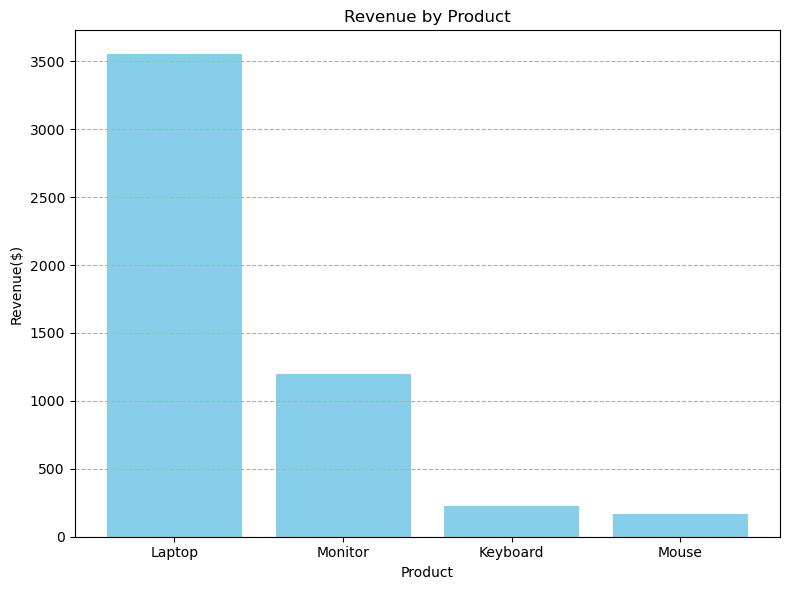

In [18]:
# 7. Create a simple bar chart of total revenue per product
plt.figure(figsize=(8, 6))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue($)")
plt.title("Revenue by Product")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [10]:
conn.close()

print("\nScript executed successfully! You should see the sales summary bar chart displayed.")


Script executed successfully! You should see the sales summary bar chart displayed.
